<a href="https://colab.research.google.com/github/rafaelrubo/python-geociencias/blob/main/python_geociencias05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Aplicado às Geociências
##Parte 06
#####Rafael Rubo
#####rafaelrubo@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Suponha que temos dados simulados​
profundidade = np.array([1000, 1100, 1200, 1300, 1400]).reshape(-1, 1)
porosidade = np.array([0.247, 0.233, 0.207, 0.193, 0.170]) # valores decrescentes​

# Criando e ajustando o modelo de regressão​
modelo = LinearRegression()
modelo.fit(profundidade, porosidade)

# Previsões​
preditos = modelo.predict(profundidade)

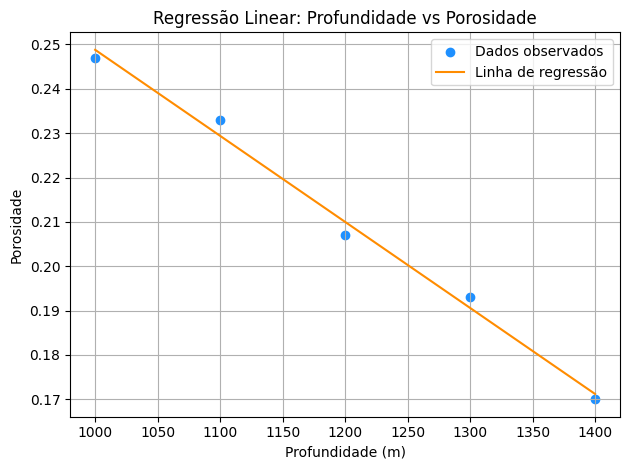

In [2]:
plt.scatter(profundidade, porosidade, color='dodgerblue', label='Dados observados')
plt.plot(profundidade, preditos, color='darkorange', label='Linha de regressão')
plt.xlabel('Profundidade (m)')
plt.ylabel('Porosidade')
plt.title('Regressão Linear: Profundidade vs Porosidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Dados simulados de poço​
np.random.seed(42)
profundidade = np.linspace(4000, 5000, 100)
densidade = 2.2 + 0.0003 * profundidade + np.random.normal(0, 0.02, 100)
porosidade = np.clip(30 - 0.005 * profundidade + np.random.normal(0, 0.5, 100), 5, 30)

# Definindo classes simples de litologia: 0 = Arenito, 1 = Folhelho​
# Regra simples: se porosidade > 7, então arenito; senão, folhelho​
litologia = (porosidade > 7).astype(int)

# DataFrame​
data = pd.DataFrame({
'Densidade': densidade,
'Porosidade': porosidade,
'Litologia': litologia
})

# Modelo de regressão logística​
X = data[['Densidade', 'Porosidade']]
y = data['Litologia']
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

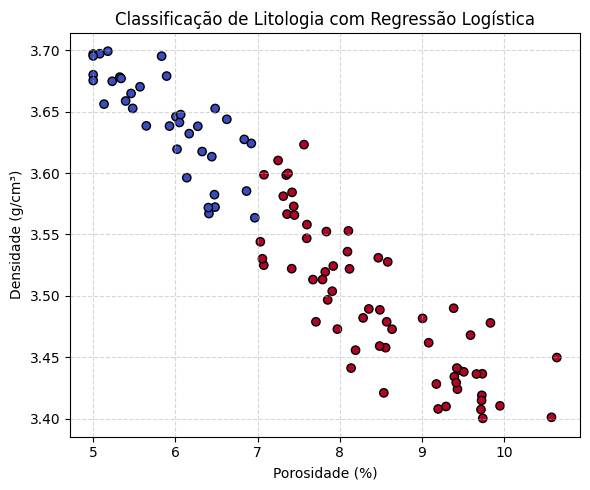

In [6]:
# Visualizando os dados e fronteira de decisão​

plt.figure(figsize=(6, 5))
plt.scatter(data['Porosidade'], data['Densidade'], c=data['Litologia'], cmap='coolwarm', edgecolor='k')
plt.xlabel('Porosidade (%)')
plt.ylabel('Densidade (g/cm³)')
plt.title('Classificação de Litologia com Regressão Logística')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [7]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Dados simulados de espectros de rochas​
np.random.seed(42)
banda1 = np.random.normal(0.3, 0.05, 50).tolist() + np.random.normal(0.6, 0.05, 50).tolist()
banda2 = np.random.normal(0.4, 0.05, 50).tolist() + np.random.normal(0.7, 0.05, 50).tolist()
litotipo = [0]*50 + [1]*50 # 0 = Arenito, 1 = Basalto​

# DataFrame​
data = pd.DataFrame({
'Banda_1': banda1,
'Banda_2': banda2,
'Litotipo': litotipo
})

# Modelo KNN​
X = data[['Banda_1', 'Banda_2']]
y = data['Litotipo']
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

KNeighborsClassifier()

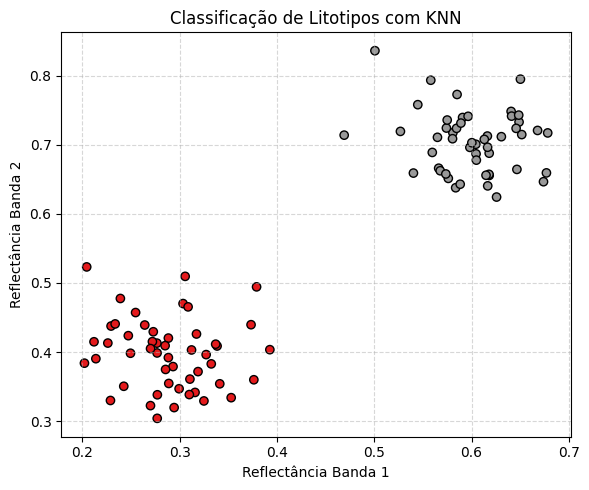

In [8]:
# Plot​

plt.figure(figsize=(6,5))
plt.scatter(data['Banda_1'], data['Banda_2'], c=data['Litotipo'], cmap='Set1', edgecolor='k')
plt.xlabel('Reflectância Banda 1')
plt.ylabel('Reflectância Banda 2')
plt.title('Classificação de Litotipos com KNN')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dados simulados calibrados​
data = pd.DataFrame({
'Granulometria_media_mm': [0.55, 0.5, 0.05, 0.06, 0.45, 0.4, 0.07, 0.08, 0.5, 0.52, 0.1, 0.09, 0.5, 0.06, 0.42, 0.09],
'Selecao_boa': [1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
'Estratificacao_cruzada': [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
'Ambiente': ['Eólico', 'Eólico', 'Marinho', 'Marinho',
'Fluvial', 'Fluvial', 'Deltaico', 'Deltaico',
'Fluvial', 'Eólico', 'Deltaico', 'Marinho',
'Fluvial', 'Marinho', 'Fluvial', 'Deltaico']
})

# Modelo​
X = data[['Granulometria_media_mm', 'Selecao_boa', 'Estratificacao_cruzada']]
y = data['Ambiente']
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

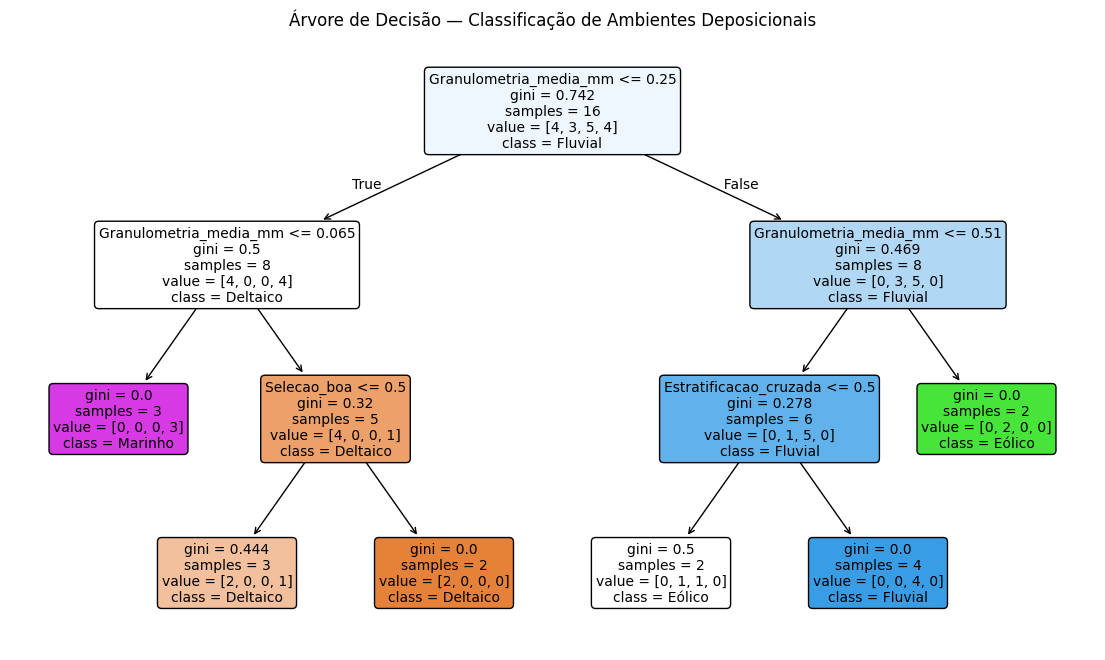

In [10]:
# Plot​

plt.figure(figsize=(14, 8))
plot_tree(modelo,
feature_names=X.columns,
class_names=modelo.classes_,
filled=True,
rounded=True,
fontsize=10)
plt.title('Árvore de Decisão — Classificação de Ambientes Deposicionais')
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import sobel, gaussian_filter, laplace

# Carregando imagem RGB​
img = plt.imread("sales.tif")

# Separar os canais da imagem​
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]

# Aplicar filtros Sobel​
sobel_R = sobel(R)
sobel_G = sobel(G)
sobel_B = sobel(B)

# Aplicar filtros Gaussiano (sigma=1)​
gauss_R = gaussian_filter(R, sigma=1)
gauss_G = gaussian_filter(G, sigma=1)
gauss_B = gaussian_filter(B, sigma=1)

# Aplicar Diferença de Gaussianas (DoG)​
dog_R = gaussian_filter(R, sigma=1) - gaussian_filter(R, sigma=2)
dog_G = gaussian_filter(G, sigma=1) - gaussian_filter(G, sigma=2)
dog_B = gaussian_filter(B, sigma=1) - gaussian_filter(B, sigma=2)

# Aplicar Laplaciano (como traço da matriz Hessiana)​
hess_R = laplace(R)
hess_G = laplace(G)
hess_B = laplace(B)

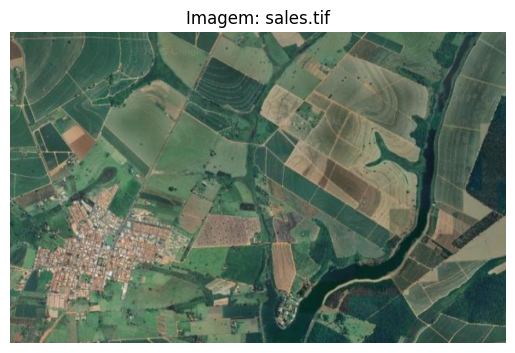

In [16]:
plt.imshow(img)
plt.axis('off')  # remove os eixos, opcional
plt.title("Imagem: sales.tif")
plt.show()

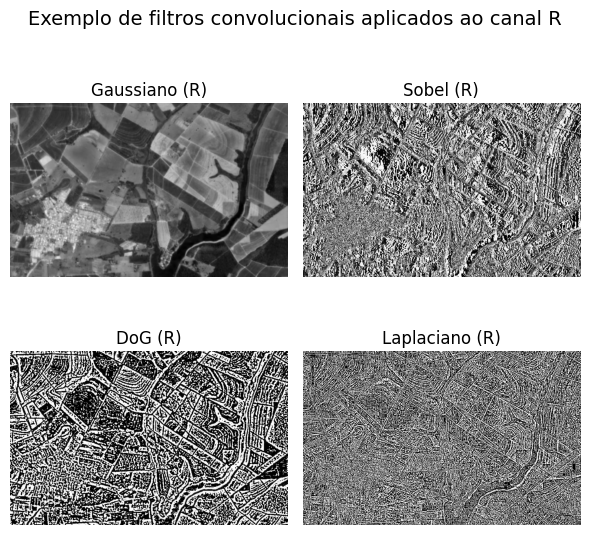

In [13]:
# Visualização dos filtros para o canal Red​

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
axs[0, 0].imshow(gauss_R, cmap='gray'); axs[0, 0].set_title("Gaussiano (R)")
axs[0, 1].imshow(sobel_R, cmap='gray'); axs[0, 1].set_title("Sobel (R)")
axs[1, 0].imshow(dog_R, cmap='gray'); axs[1, 0].set_title("DoG (R)")
axs[1, 1].imshow(hess_R, cmap='gray'); axs[1, 1].set_title("Laplaciano (R)")

for ax in axs.flat:
  ax.axis("off")

plt.suptitle("Exemplo de filtros convolucionais aplicados ao canal R", fontsize=14)
plt.tight_layout()
plt.show()